<a href="https://www.kaggle.com/code/emreakpnr/akbank-proje?scriptVersionId=203190448" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

## Data Analyzing & EDA

In [2]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt


import os
label = []
path = []
fish_dir = "/kaggle/input/a-large-scale-fish-dataset/Fish_Dataset/Fish_Dataset"

for dir_name, _, filenames in os.walk(fish_dir):
    for filename in filenames:
        if os.path.splitext(filename)[-1] == ".png":
            if dir_name.split()[-1] != "GT":
                label.append(os.path.split(dir_name)[-1])
                path.append(os.path.join(dir_name,filename))

data = pd.DataFrame(columns=["path","label"])
data["path"] = path
data["label"] = label

Above code searches for files with the .png extension under the specified directory. It finds files whose directory name is not "GT" and collects the paths and labels of these files. As a result, it creates a Pandas DataFrame with this information. This DataFrame represents the dataset to be used for training and contains data obtained only from directories other than "GT."

In [3]:
data

,path,label
0,/kaggle/input/a-large-scale-fish-dataset/Fish_...,Hourse Mackerel
1,/kaggle/input/a-large-scale-fish-dataset/Fish_...,Hourse Mackerel
2,/kaggle/input/a-large-scale-fish-dataset/Fish_...,Hourse Mackerel
3,/kaggle/input/a-large-scale-fish-dataset/Fish_...,Hourse Mackerel
4,/kaggle/input/a-large-scale-fish-dataset/Fish_...,Hourse Mackerel
...,...,...
8995,/kaggle/input/a-large-scale-fish-dataset/Fish_...,Red Sea Bream
8996,/kaggle/input/a-large-scale-fish-dataset/Fish_...,Red Sea Bream
8997,/kaggle/input/a-large-scale-fish-dataset/Fish_...,Red Sea Bream
8998,/kaggle/input/a-large-scale-fish-dataset/Fish_...,Red Sea Bream


In [4]:
data.describe(), data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9000 entries, 0 to 8999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   path    9000 non-null   object
 1   label   9000 non-null   object
dtypes: object(2)
memory usage: 140.8+ KB


(                                                     path            label
 count                                                9000             9000
 unique                                               9000                9
 top     /kaggle/input/a-large-scale-fish-dataset/Fish_...  Hourse Mackerel
 freq                                                    1             1000,
 None)

#### Species and counts

In [5]:
data.label.value_counts()

label
Hourse Mackerel       1000
Black Sea Sprat       1000
Sea Bass              1000
Red Mullet            1000
Trout                 1000
Striped Red Mullet    1000
Shrimp                1000
Gilt-Head Bream       1000
Red Sea Bream         1000
Name: count, dtype: int64

#### Example photos of species

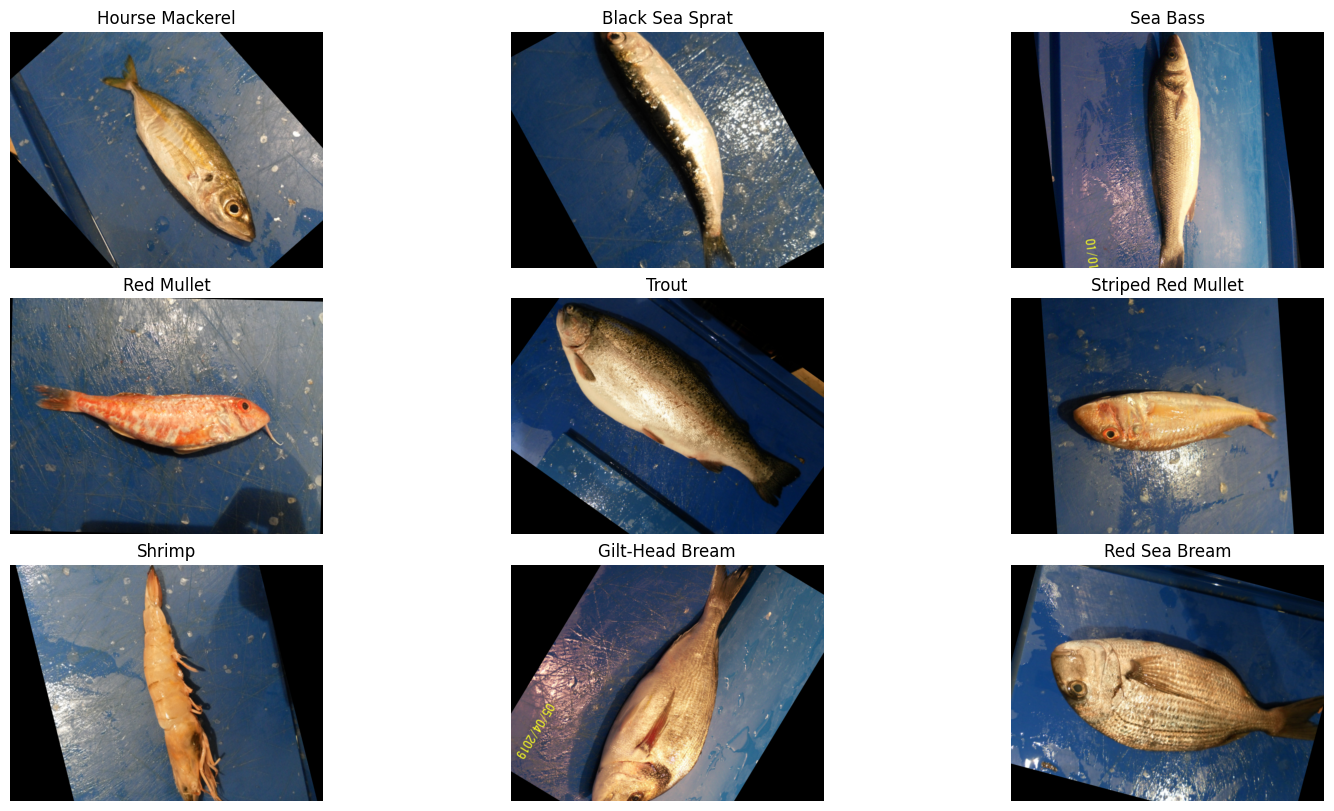

In [10]:
fig, ax = plt.subplots(nrows=3, ncols=3, figsize=(15, 8), constrained_layout=True)
ax = ax.flatten()
j = 0
for i in data['label'].unique():
    ax[j].imshow(plt.imread(data[data['label'] == i].iloc[0, 0]))
    ax[j].set_title(i)  
    ax[j].axis('off')  # Eksenleri kapat
    j += 1

plt.show()

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test=train_test_split(data, test_size=0.2, random_state=42)
X_train.shape,X_test.shape

((7200, 2), (1800, 2))

### Augmanteting the data

In [15]:
from tensorflow.keras.applications.resnet import preprocess_input
from tensorflow.keras.preprocessing.image import ImageDataGenerator

trainGen = ImageDataGenerator(preprocessing_function=preprocess_input, validation_split=0.3)
testGen =ImageDataGenerator(preprocessing_function= preprocess_input)

X_train_img = trainGen.flow_from_dataframe(dataframe=X_train, x_col='path', y_col='label',class_mode='categorical', subset='training', color_mode='rgb', batch_size=32)

X_val_img = trainGen.flow_from_dataframe(dataframe=X_train, x_col='path', y_col='label',class_mode='categorical', subset='validation', color_mode='rgb', batch_size=32)

X_test_img =testGen.flow_from_dataframe(dataframe=X_test, x_col='path', y_col='label',class_mode='categorical', color_mode='rgb', batch_size=32, shuffle=False)

Found 5040 validated image filenames belonging to 9 classes.
Found 2160 validated image filenames belonging to 9 classes.
Found 1800 validated image filenames belonging to 9 classes.


Label: [[0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0.]]
Label: [[0. 0. 0. 1. 0. 0. 0. 0.

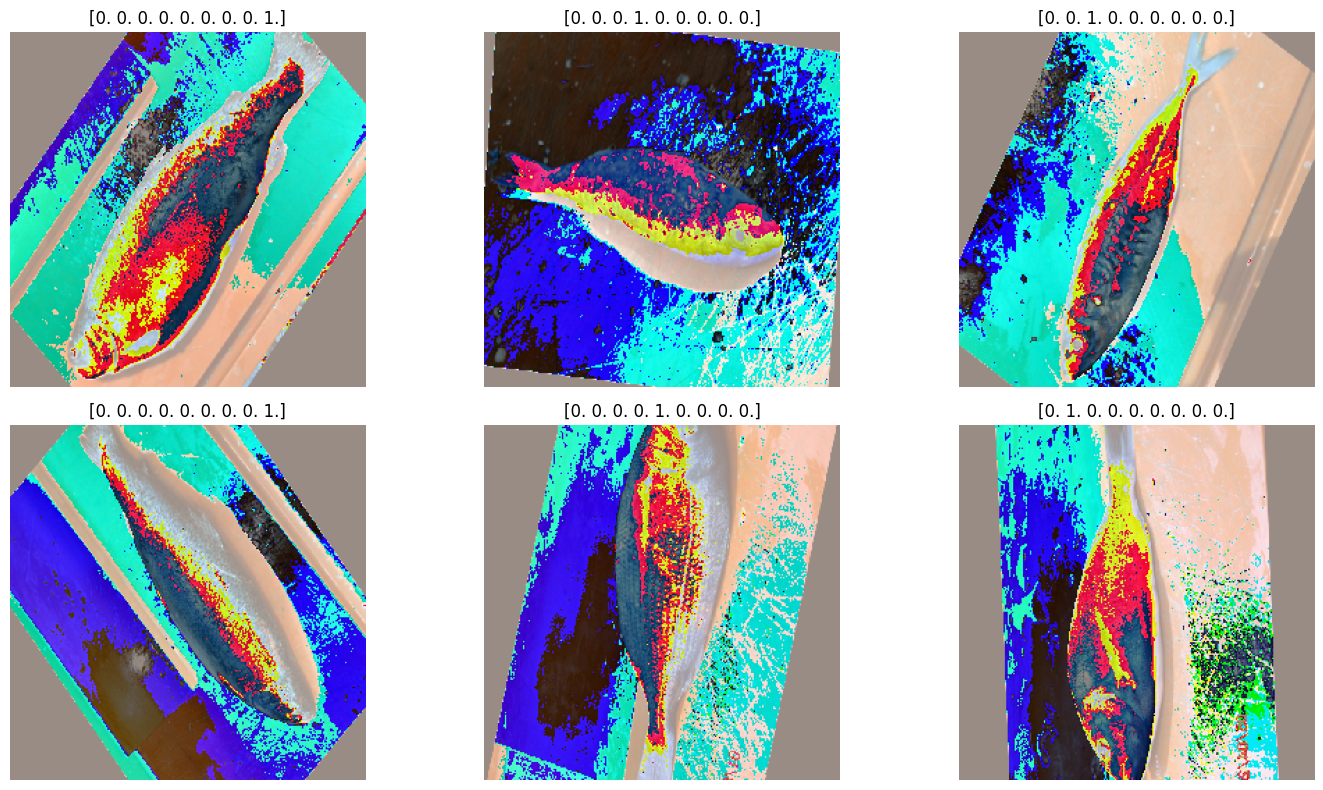

In [26]:
fit, ax = plt.subplots(nrows=2, ncols=3, figsize=(15, 8))
ax = ax.flatten()
j = 0
for _ in range(6):
    img, label = next(X_test_img) 
    ax[j].imshow(img[0].astype('uint8'))  

    print("Label:", label)  
    if isinstance(label, np.ndarray) and label.size > 0:
        ax[j].set_title(str(label[0]))  
    else:
        ax[j].set_title("Unknown Label") 

    ax[j].axis('off')  
    j += 1

plt.tight_layout()  
plt.show() 

## The Model

In [35]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.optimizers import Adam


fc_model = tf.keras.models.Sequential([
  tf.keras.layers.Rescaling(1./255),
  tf.keras.layers.Flatten(input_shape=(113,)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(9,activation="softmax")
])

fc_model.compile(optimizer="adam",
             loss="categorical_crossentropy",
             metrics=["accuracy"])


/opt/conda/lib/python3.10/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [37]:
Callback = tf.keras.callbacks.EarlyStopping(monitor='accuracy', patience=3)
mo_fit = fc_model.fit(X_train_img,
                validation_data = X_val_img,
                #batch_size = 32,
                epochs = 10, callbacks=Callback)

Epoch 1/10


/opt/conda/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


158/158 ━━━━━━━━━━━━━━━━━━━━ 160s 964ms/step - accuracy: 0.2000 - loss: 7.3778 - val_accuracy: 0.2889 - val_loss: 1.9535
Epoch 2/10
158/158 ━━━━━━━━━━━━━━━━━━━━ 121s 749ms/step - accuracy: 0.2585 - loss: 2.0300 - val_accuracy: 0.2611 - val_loss: 1.9267
Epoch 3/10
158/158 ━━━━━━━━━━━━━━━━━━━━ 122s 757ms/step - accuracy: 0.2567 - loss: 1.9438 - val_accuracy: 0.2542 - val_loss: 2.0280
Epoch 4/10
158/158 ━━━━━━━━━━━━━━━━━━━━ 122s 751ms/step - accuracy: 0.2652 - loss: 1.9294 - val_accuracy: 0.2769 - val_loss: 1.8584
Epoch 5/10
158/158 ━━━━━━━━━━━━━━━━━━━━ 121s 750ms/step - accuracy: 0.2889 - loss: 1.8208 - val_accuracy: 0.2801 - val_loss: 1.7830
Epoch 6/10
158/158 ━━━━━━━━━━━━━━━━━━━━ 122s 753ms/step - accuracy: 0.2937 - loss: 1.8156 - val_accuracy: 0.3042 - val_loss: 1.7565
Epoch 7/10
158/158 ━━━━━━━━━━━━━━━━━━━━ 121s 746ms/step - accuracy: 0.3009 - loss: 1.7743 - val_accuracy: 0.3014 - val_loss: 1.7147
Epoch 8/10
158/158 ━━━━━━━━━━━━━━━━━━━━ 121s 747ms/step - accuracy: 0.3097 - loss: 1.76

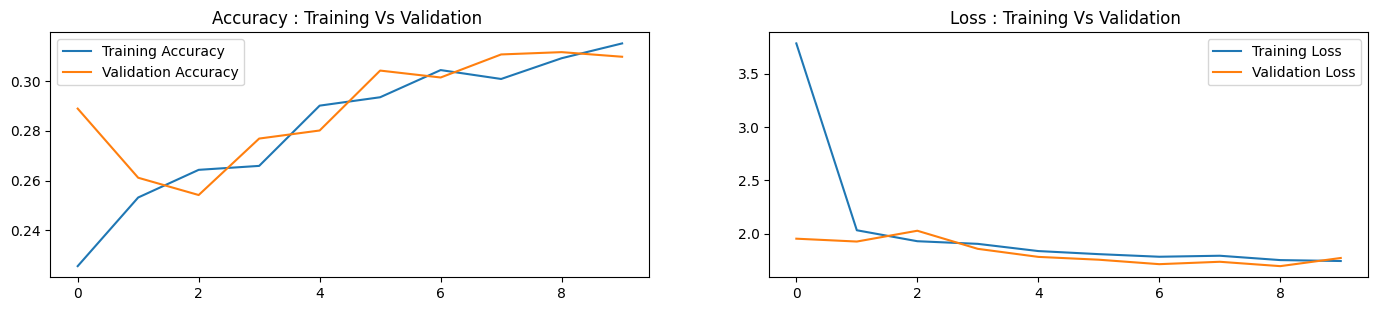

In [39]:
accuracy = mo_fit.history['accuracy']
loss = mo_fit.history['loss']
validation_loss = mo_fit.history['val_loss']
validation_accuracy = mo_fit.history['val_accuracy']



plt.figure(figsize=(17, 7))
plt.subplot(2, 2, 1)
plt.plot(range(10), accuracy, label='Training Accuracy')
plt.plot(range(10), validation_accuracy, label='Validation Accuracy')
plt.legend(loc='upper left')
plt.title('Accuracy : Training Vs Validation ')



plt.subplot(2, 2, 2)
plt.plot(range(10), loss, label='Training Loss')
plt.plot(range(10), validation_loss, label='Validation Loss')
plt.title('Loss : Training Vs Validation ')
plt.legend(loc='upper right')
plt.show()

In [41]:
test_accuracy = fc_model.evaluate(X_test_img)[1] * 100
print('Test accuracy is : ',test_accuracy, '%' )

57/57 ━━━━━━━━━━━━━━━━━━━━ 24s 427ms/step - accuracy: 0.3356 - loss: 1.8487
Test accuracy is :  33.666667342185974 %


In [43]:
y_pred = fc_model.predict(X_test_img)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = X_test_img.classes

57/57 ━━━━━━━━━━━━━━━━━━━━ 24s 409ms/step


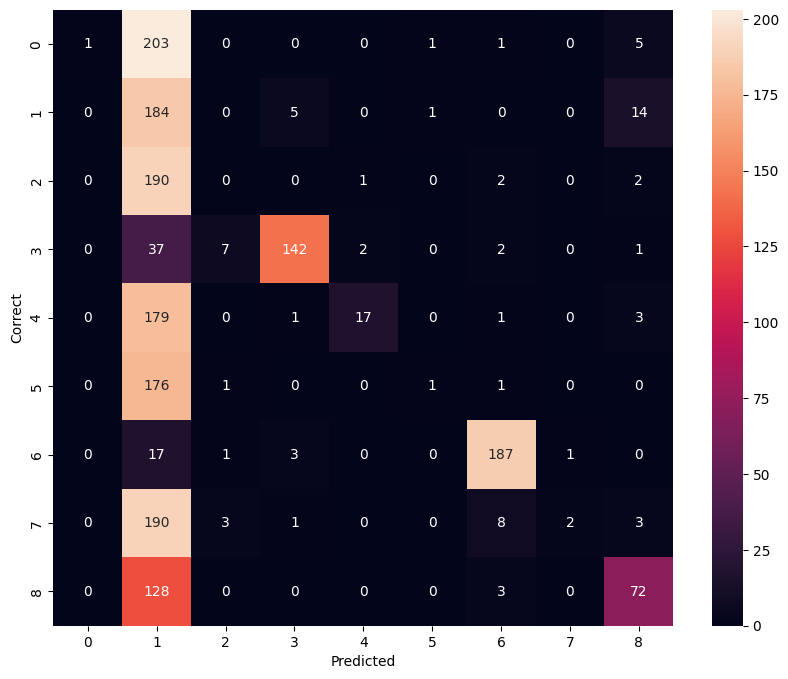

In [44]:
from sklearn.metrics import confusion_matrix
import seaborn as sns


cm = confusion_matrix(y_true, y_pred_classes)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Correct')
plt.show()

#### Report

In [46]:
from sklearn.metrics import classification_report

y_pred = fc_model.predict(X_test_img)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = X_test_img.classes

print("\nClassification Report:")
print(classification_report(y_true, y_pred_classes, 
                          target_names=X_test_img.class_indices.keys()))

57/57 ━━━━━━━━━━━━━━━━━━━━ 24s 417ms/step

Classification Report:
                    precision    recall  f1-score   support

   Black Sea Sprat       1.00      0.00      0.01       211
   Gilt-Head Bream       0.14      0.90      0.24       204
   Hourse Mackerel       0.00      0.00      0.00       195
        Red Mullet       0.93      0.74      0.83       191
     Red Sea Bream       0.85      0.08      0.15       201
          Sea Bass       0.33      0.01      0.01       179
            Shrimp       0.91      0.89      0.90       209
Striped Red Mullet       0.67      0.01      0.02       207
             Trout       0.72      0.35      0.48       203

          accuracy                           0.34      1800
         macro avg       0.62      0.33      0.29      1800
      weighted avg       0.62      0.34      0.30      1800

